<a href="https://colab.research.google.com/github/sreelakshmy-byte/Entry-Student/blob/main/Players_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset from Google Sheets
file_url ='https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv'
df = pd.read_csv(file_url)

# Display the first few rows to understand the dataset structure
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [ ]:
# Preprocessing: Replace the "height" column with random numbers between 150 and 180
np.random.seed(42)  # Set seed for reproducibility
df['Height'] = np.random.randint(150, 181, size=len(df))


# Ensure data consistency and integrity
print("Summary statistics before analysis:")
print(df.describe())

Summary statistics before analysis:
           Number         Age      Height      Weight        Salary
count  458.000000  458.000000  458.000000  458.000000  4.470000e+02
mean    17.713974   26.934498  165.085153  221.543668  4.833970e+06
std     15.966837    4.400128    9.412232   26.343200  5.226620e+06
min      0.000000   19.000000  150.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  156.250000  200.000000  1.025210e+06
50%     13.000000   26.000000  165.000000  220.000000  2.836186e+06
75%     25.000000   30.000000  174.000000  240.000000  6.500000e+06
max     99.000000   40.000000  180.000000  307.000000  2.500000e+07


<ipython-input-4-691b6ae8829e>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value, f'{team_percentage[index]:.2f}%', ha='center', va='bottom', fontsize=7)


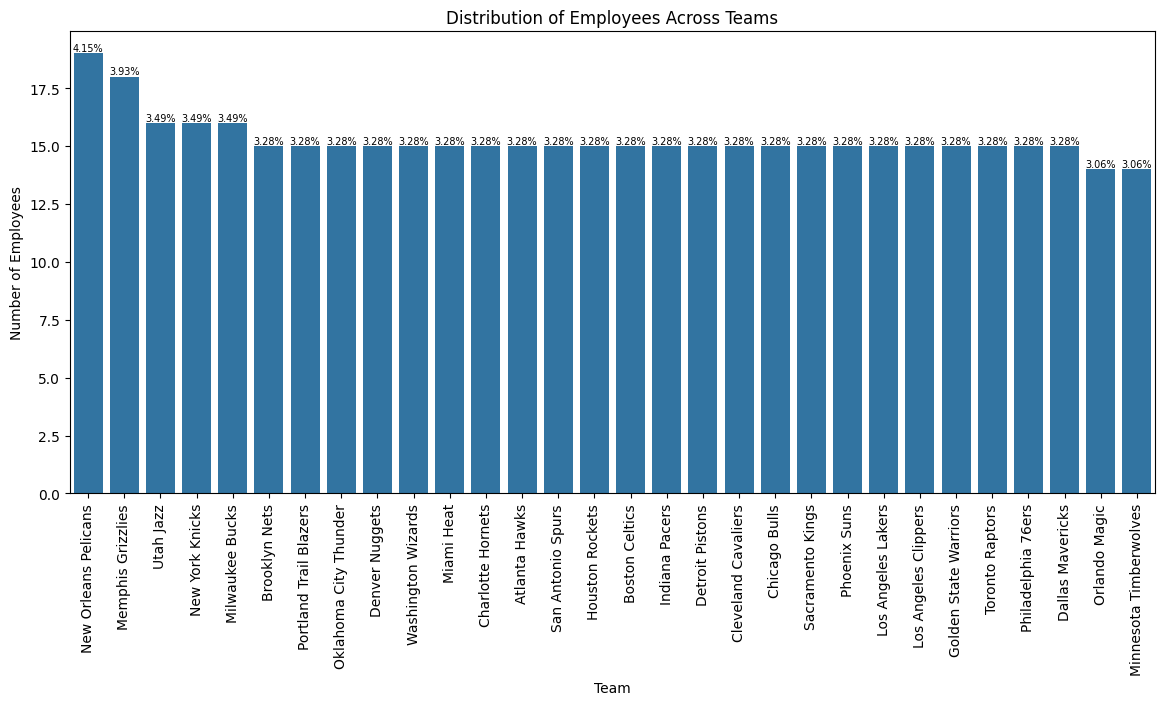

In [ ]:
# Analysis Task 1: Distribution of employees across each team and percentage split
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

# Plot the distribution of employees across teams
plt.figure(figsize=(14, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)

# Annotate percentage values on the bars
for index, value in enumerate(team_distribution.values):
    plt.text(index, value, f'{team_percentage[index]:.2f}%', ha='center', va='bottom', fontsize=7)

plt.show()

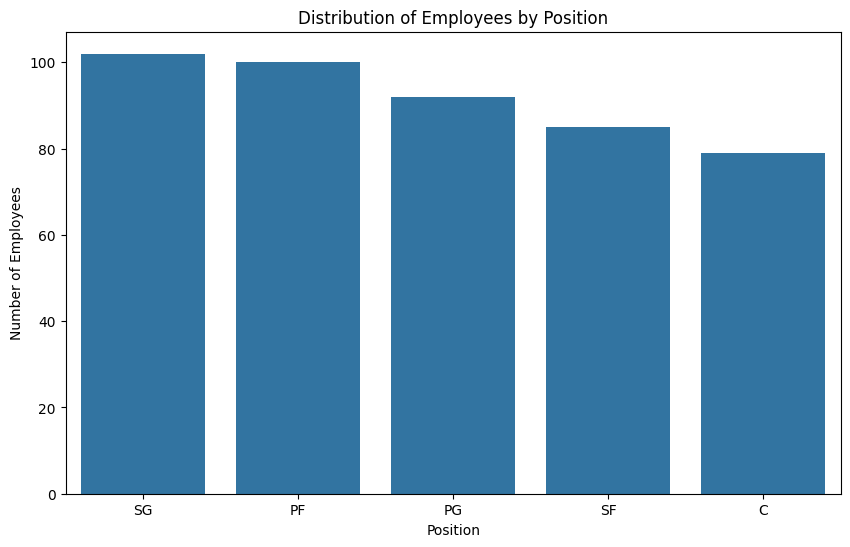

In [ ]:
# Analysis Task 2: Segregate employees based on their positions
position_distribution = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

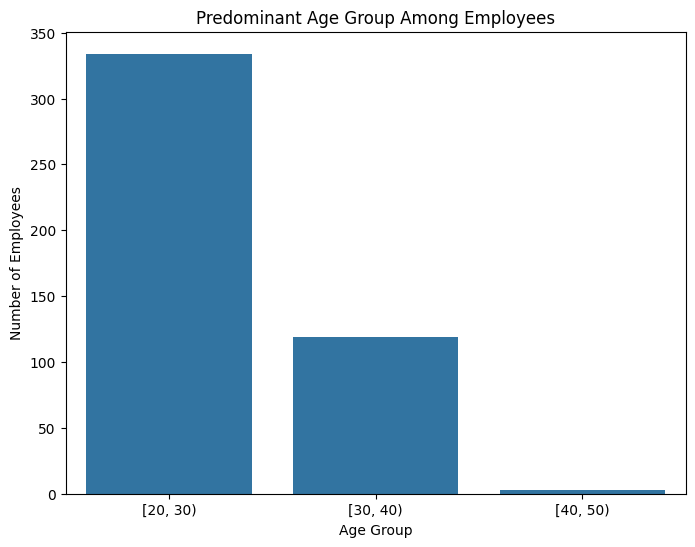

In [ ]:
# Analysis Task 3: Predominant age group among employees
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50], right=False)
age_group_distribution = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_distribution.index.astype(str), y=age_group_distribution.values)
plt.title('Predominant Age Group Among Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

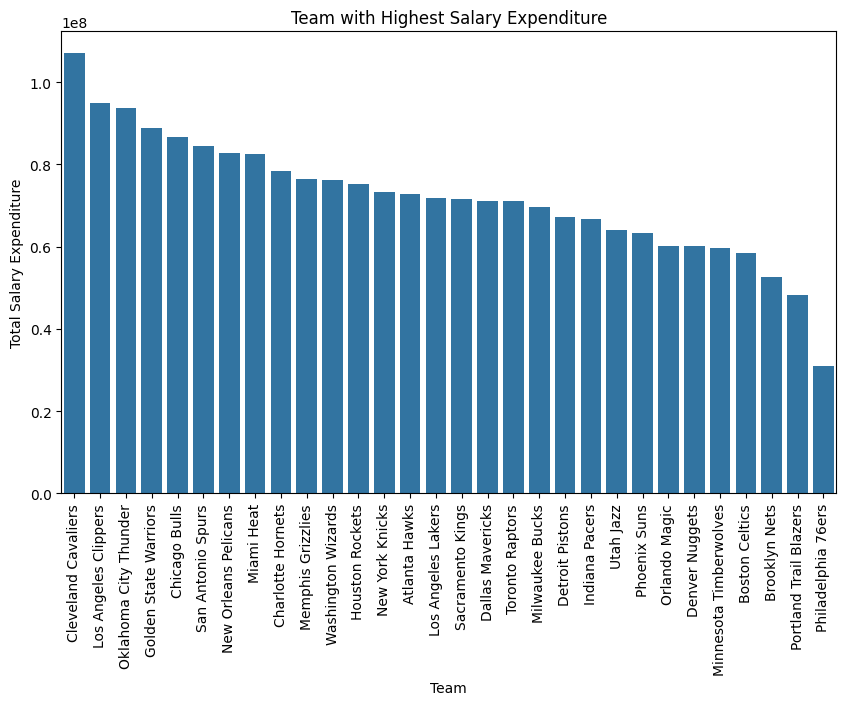

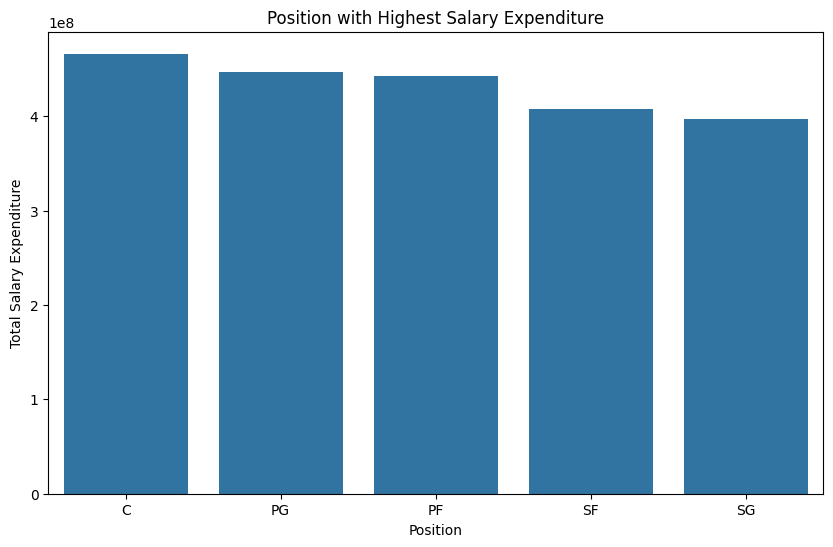

In [ ]:
# Analysis Task 4: Team and position with the highest salary expenditure
team_salary_expenditure = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary_expenditure = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary_expenditure.index, y=team_salary_expenditure.values)
plt.title('Team with Highest Salary Expenditure')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.ylabel('Total Salary Expenditure')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values)
plt.title('Position with Highest Salary Expenditure')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.show()

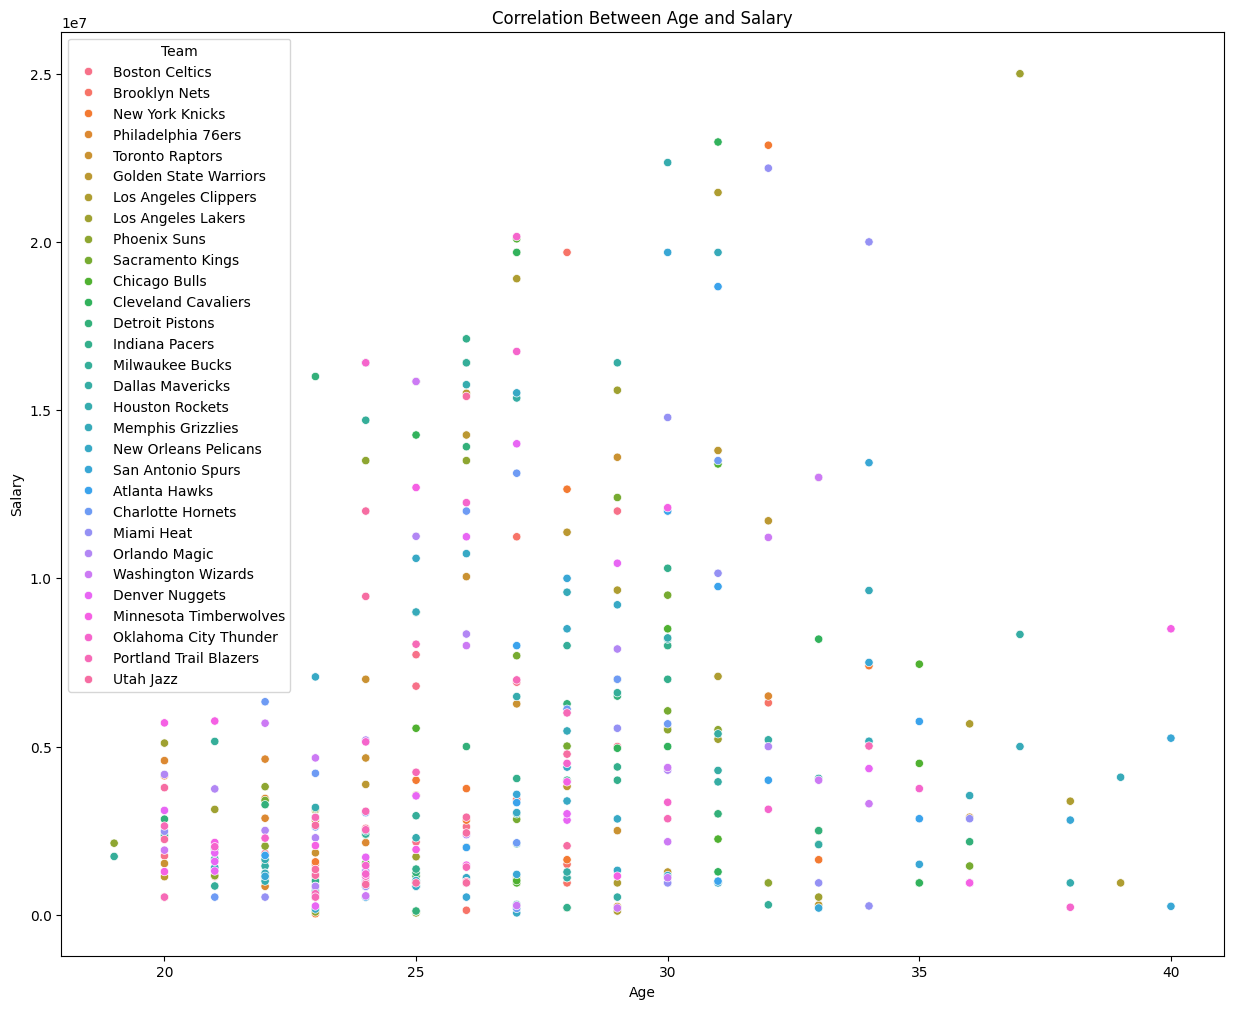

In [ ]:
# Analysis Task 5: Correlation between age and salary
plt.figure(figsize=(15, 12))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Team'])
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



In [ ]:

print("\nData Story: Insights Gained")

# Insight for team distribution
print("1. The New Orleans Pelicans have the highest number of employees, accounting for approximately 4.15% of the total employees across all teams. The Orlando Magic and Minnesota Timberwolves have lowest percentage of employees, each at 3.06%. There is a noticeable uniformity in the distribution of employees across most teams, with a large number of teams having around 3.28% of the employees.")

# Insight for position distribution
print("2. The positions of Shooting Guard and Power Forward have the highest numbers of employees, indicating these roles may be in higher demand or have a greater number of players in the dataset.Although there are differences in the numbers, the distribution of employees across the positions is relatively balanced, with no position having an extremely low count.  There is a slight drop-off in the number of employees as we move from Shooting Guards and Power Forwards to Centers.")

# Insight for predominant age group
print("3. The age group of 20 to 30 years has the highest number of employees, with around 320 employees. This indicates that the majority of employees are relatively young. There is a noticeable decline in the number of employees as age increases, with the 30 to 40 age group having fewer employees and the 40 to 50 age group having very few.")

# Insight for highest salary expenditure
print("4. The data reveals that teams like the Cleveland Cavaliers, Los Angeles Clippers, and Golden State Warriors invest heavily in their players. This indicates a competitive approach to securing top talent, potentially to improve team performance. The Center position being the highest-paid suggests that teams place significant importance on having a strong presence in the key areas of defense and rebounding. Similarly, high expenditure is for Point Guards and Power Forwards.")

# Insight for correlation between age and salary
print("5.There's a diverse distribution of player salaries across different teams. However, some teams have a higher concentration of high-salary players, which could be indicative of their financial strategies and market positions. Teams like the Golden State Warriors, Los Angeles Lakers, and Brooklyn Nets seem to have several high-salary players, hinting at their strategy of acquiring or retaining top talent.")



Data Story: Insights Gained
1. The New Orleans Pelicans have the highest number of employees, accounting for approximately 4.15% of the total employees across all teams. The Orlando Magic and Minnesota Timberwolves have lowest percentage of employees, each at 3.06%. There is a noticeable uniformity in the distribution of employees across most teams, with a large number of teams having around 3.28% of the employees.
2. The positions of Shooting Guard and Power Forward have the highest numbers of employees, indicating these roles may be in higher demand or have a greater number of players in the dataset.Although there are differences in the numbers, the distribution of employees across the positions is relatively balanced, with no position having an extremely low count.  There is a slight drop-off in the number of employees as we move from Shooting Guards and Power Forwards to Centers.
3. The age group of 20 to 30 years has the highest number of employees, with around 320 employees. Thi